# Examining output of the initial experiment
* Distribution of each measure under rotation, -45 to 45 degrees
* Distribution of each measure between matched floes
* Division into "too small to track", "small", and "large" floes based on uncertainties

In [1]:
import pandas as pd
import os
import proplot as pplt
import numpy as np

data = []
for fname in os.listdir('../data/rotate_rescale/'):
    if '.csv' in fname:
        df = pd.read_csv('../data/rotate_rescale/' + fname)
        df['case'] = fname.split('_')[-1].replace('.csv', '')
        if len(df) > 0:
            data.append(df)
df = pd.concat(data)
# df = df.loc[df.area > 5] # in case errors make it through
# df.drop('case', axis=1, inplace=True) # Error in code copying filename

In [2]:
import numpy as np
df['rotation_error'] = np.abs((np.deg2rad(df['est_rotation']) - np.deg2rad(df['rotation']))/(2*np.pi))

In [3]:
df = df.loc[df.area > 25].copy()

In [4]:
df['floe_id'] = [cn + '_' + str(f).zfill(4) + '_' + str(s) for cn, f, s in zip(df['case'], df['floe_id'], df['scale'])]

In [5]:
cols = [c for c in df.columns if c not in ['case']]

In [6]:
df_minmax = df[cols].groupby('floe_id').apply(lambda x: x.max() - x.min())
df_mean = df[cols].groupby('floe_id').mean()

In [7]:
df_minmax['mean_area'] = df_mean['area']
df_minmax['scale'] = df_mean['scale']

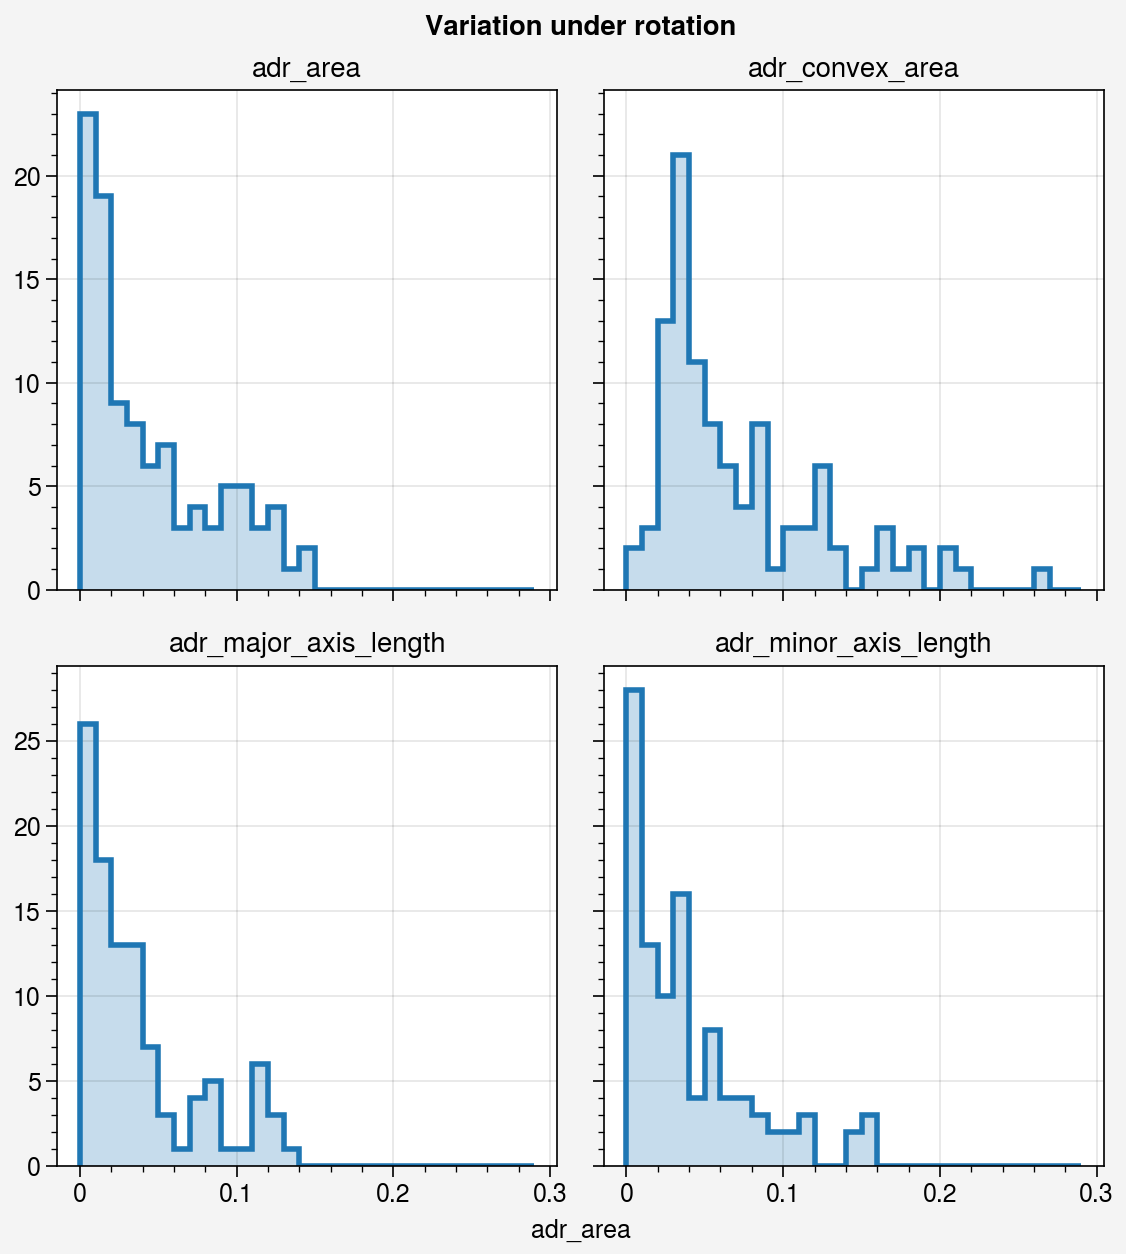

In [8]:
fig, axs = pplt.subplots(nrows=2, ncols=2)
for ax, var in zip(axs, [c for c in df.columns if 'adr' in c]):
    ax.hist(df_minmax[var], label=var, alpha=1, histtype='step',
            bins=np.arange(0, 0.3, 0.01), lw=2, color='tab:blue')
    ax.hist(df_minmax[var], label=var,histtype='stepfilled', color='tab:blue',
            bins=np.arange(0, 0.3, 0.01), alpha=0.25)
    ax.format(title=var)
axs.format(suptitle="Variation under rotation")

In [13]:
df_minmax.columns

Index(['scale', 'rotation', 'area', 'convex_area', 'major_axis_length',
       'minor_axis_length', 'adr_area', 'adr_convex_area',
       'adr_major_axis_length', 'adr_minor_axis_length', 'est_rotation',
       'mismatch', 'recall', 'normalized_sd', 'rotation_error', 'mean_area'],
      dtype='object')

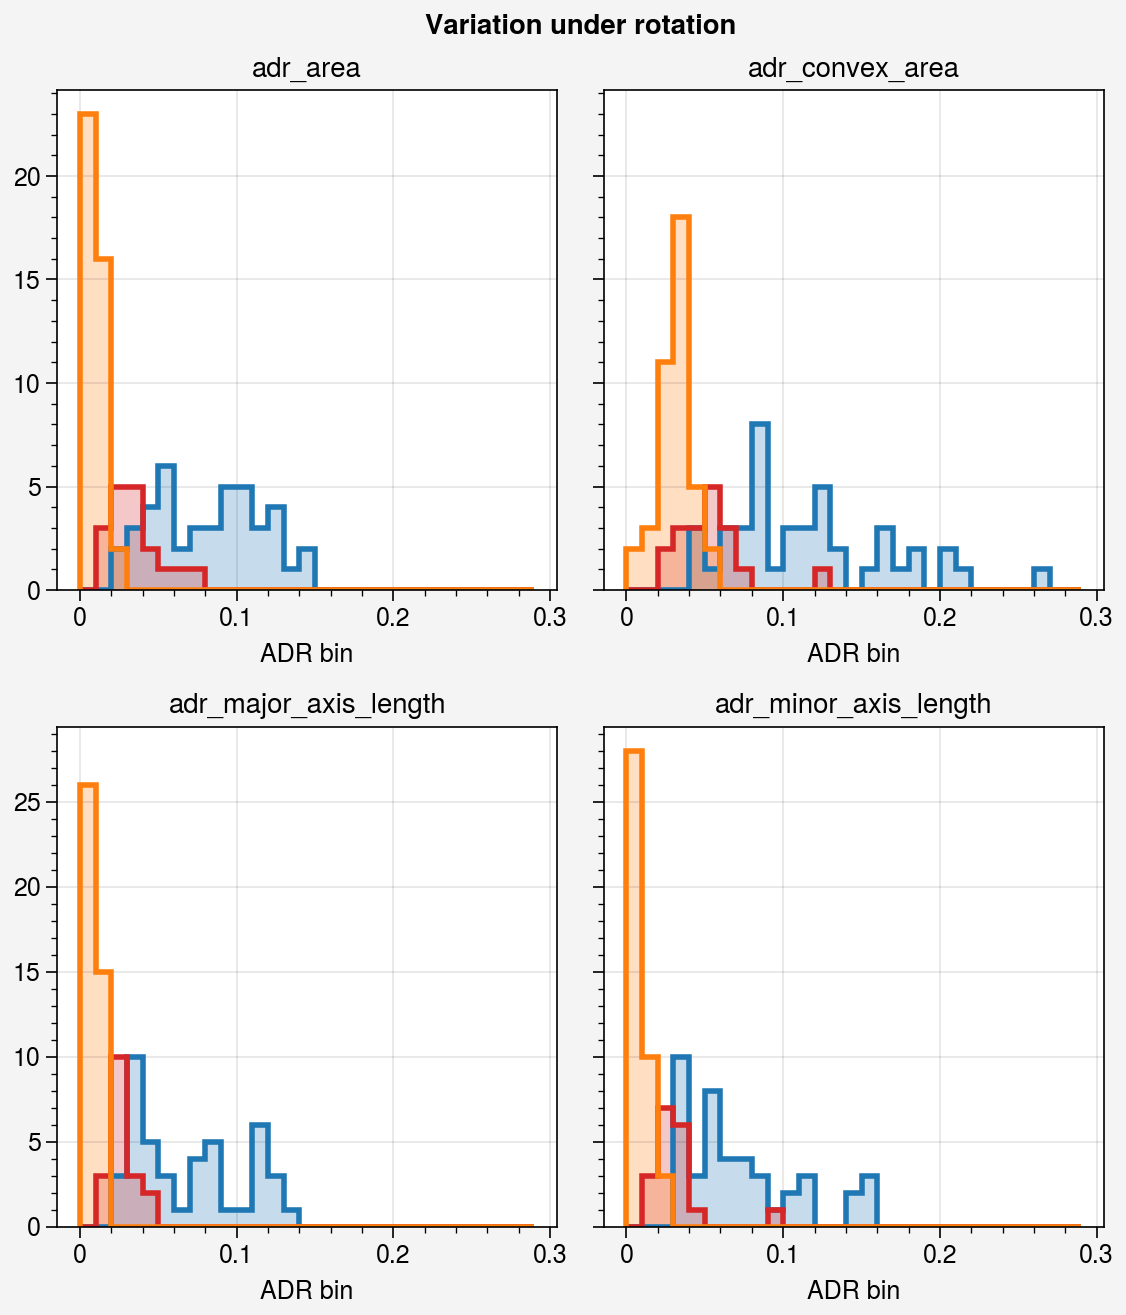

In [15]:
fig, axs = pplt.subplots(nrows=2, ncols=2, sharex=False)
for ax, var in zip(axs, [c for c in df.columns if 'adr' in c]):
    for amin, amax, color in zip([0, 150, 300], [150, 300, 1e6], ['tab:blue', 'tab:red', 'tab:orange']):
        idx = df_minmax.mean_area.between(amin, amax)
        ax.hist(df_minmax.loc[idx, var], label='', alpha=1, histtype='step',
                bins=np.arange(0, 0.3, 0.01), lw=2, color=color)
        ax.hist(df_minmax.loc[idx, var], label=str(amin) + '-' + str(amax),histtype='stepfilled',
                color=color,
                bins=np.arange(0, 0.3, 0.01), alpha=0.25)
    ax.format(title=var, xlabel='ADR bin')
axs.format(suptitle="Variation under rotation")

In [17]:
df.groupby('case').count()

,floe_id,scale,rotation,area,convex_area,major_axis_length,minor_axis_length,adr_area,adr_convex_area,adr_major_axis_length,adr_minor_axis_length,est_rotation,mismatch,recall,normalized_sd,rotation_error
case,,,,,,,,,,,,,,,,
001,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
004,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
021,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549
022,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098
036,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
043,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
065,732,732,732,732,732,732,732,732,732,732,732,732,732,732,732,732
107,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915
128,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183


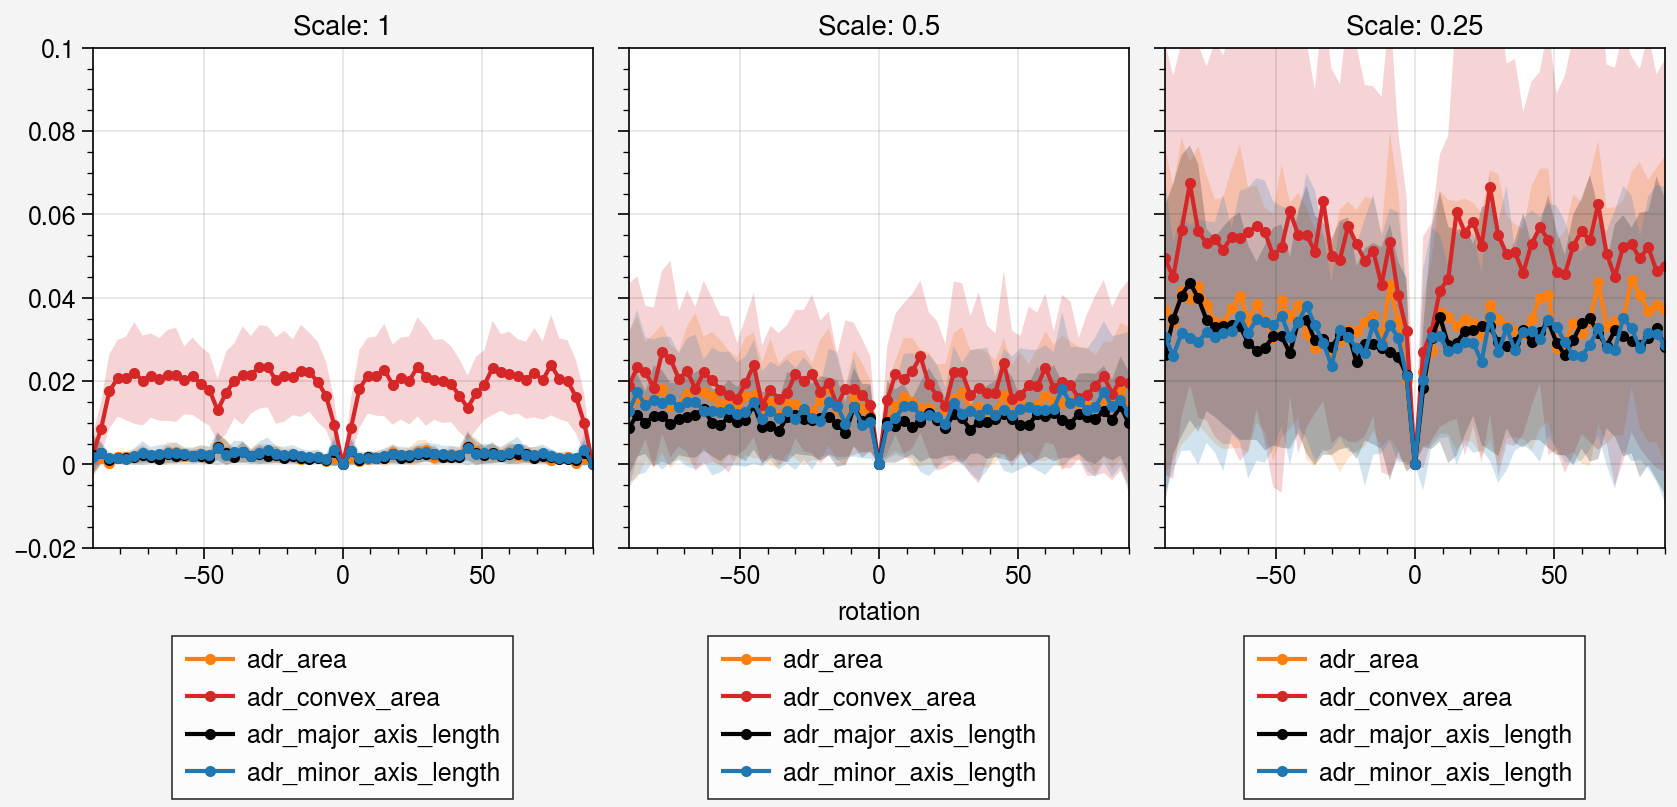

In [4]:
import proplot as pplt
fig, axs = pplt.subplots(ncols=3)
data = df.copy()
for size, ax in zip([1, 0.5, 0.25], axs):
    A = data.loc[data['scale'] == size, "area"].mean()
    for c, measure in zip(['tab:orange', 'tab:red', 'k', 'tab:blue', 'tab:green', 'gray'],
                          ['adr_area', 'adr_convex_area', 'adr_major_axis_length',
                           'adr_minor_axis_length']):
        d_mean = data.loc[data['scale']==size, ['rotation', measure]].groupby('rotation').mean()
        d_std = data.loc[data['scale']==size, ['rotation', measure]].groupby('rotation').std()
        ax.plot(d_mean, fadedata=d_std.squeeze(), marker='.', color=c,
                label=measure, ls='-', alpha=1)
    ax.format(title="Scale: " + str(size), ylim=(-0.02, 0.1))
    ax.legend(ncols=1, loc='b')

AttributeError: 'list' object has no attribute 'loc'

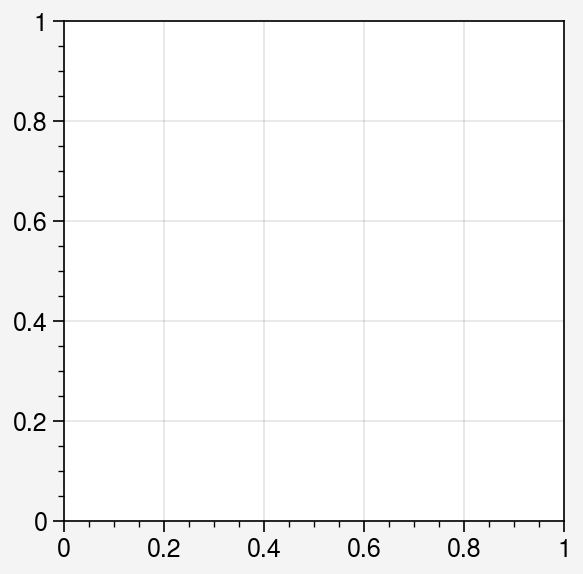

In [18]:
fig, ax = pplt.subplots()
ax.hist(data.loc[np.abs(data.rotation) < 45, ['rotation', 'est_rotation']].diff(axis=1)['est_rotation'])

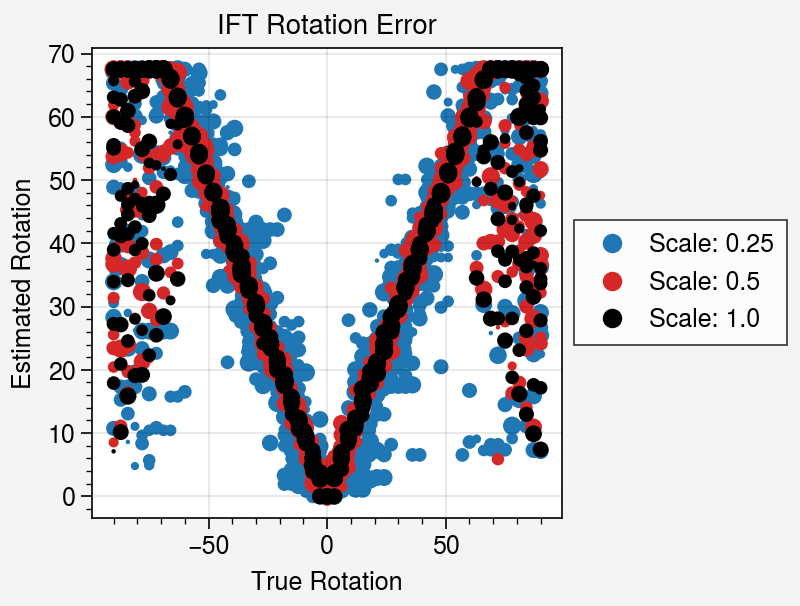

In [19]:
fig, ax = pplt.subplots(width=4)
scale_colors = {0.25: 'tab:blue', 0.5: 'tab:red', 1.0: 'k'}
for s, df_scale in df.groupby('scale'):
    for f, df_floe in df_scale.groupby('floe_id'):
        ax.scatter(df_floe['rotation'], df_floe['est_rotation'], marker='o', color=scale_colors[s],
               ms=np.sqrt(df_floe['area']), label='')
for label in scale_colors:
    ax.plot([],[],m='o', lw=0, c=scale_colors[label], label='Scale: ' + str(label))
ax.legend(ncols=1, loc='r')
ax.format(xlabel='True Rotation', ylabel='Estimated Rotation', title='IFT Rotation Error')

In [20]:
df['err_rotation'] = df['est_rotation'] - df['rotation']

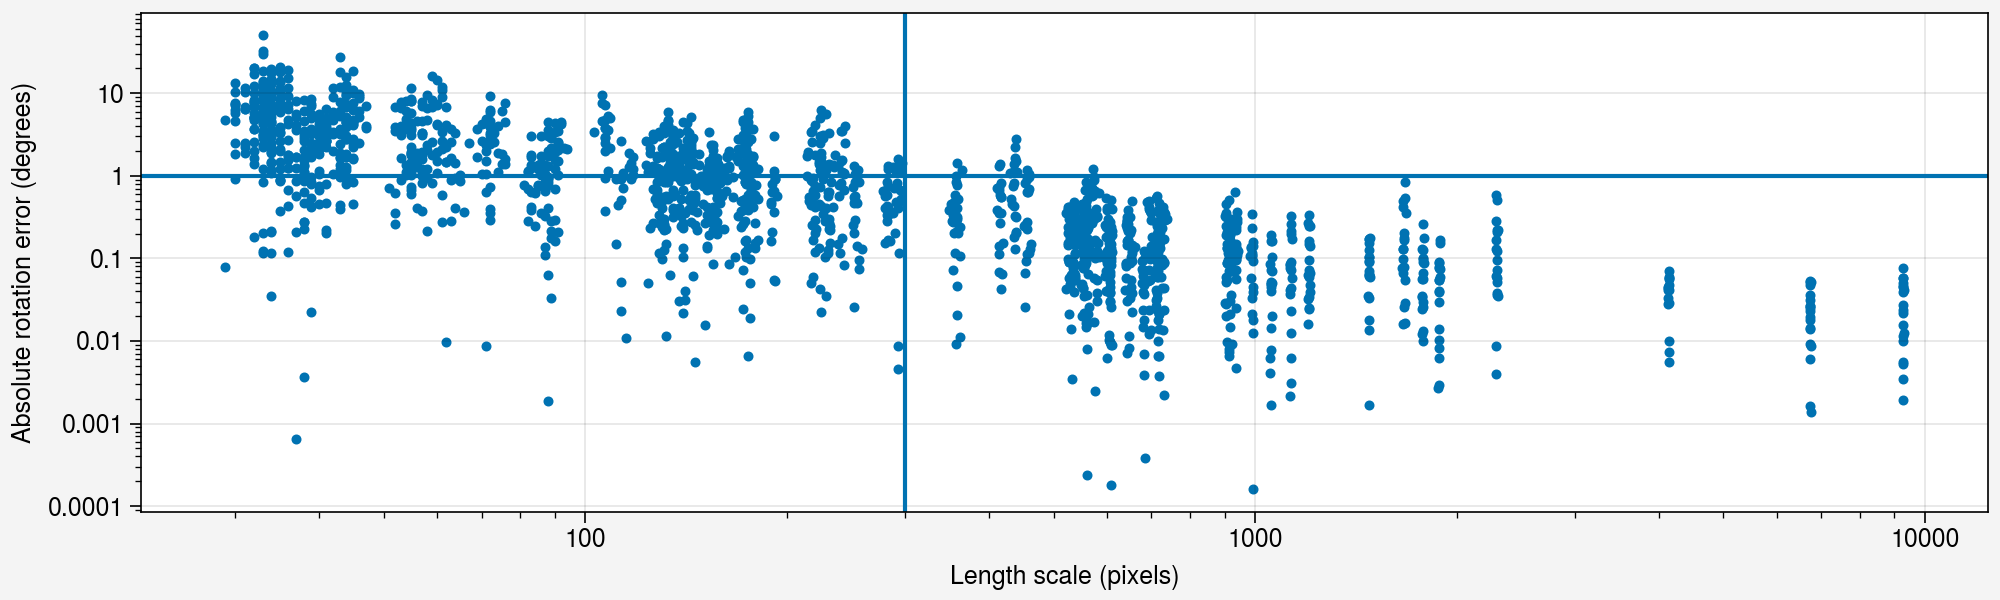

In [21]:
fig, ax = pplt.subplots(width=10, height=3)
idx = (0 < df['rotation']) & (df['rotation'] < 60) 
ax.scatter((df.loc[idx, 'area'].values),
           np.abs(df.loc[idx, 'err_rotation'].values), marker='.')
ax.format(xlabel='Length scale (pixels)')
ax.format(ylabel='Absolute rotation error (degrees)', xscale='log', yscale='log')
ax.axvline(300)
ax.axhline(1)
# ax.axhline(-1)


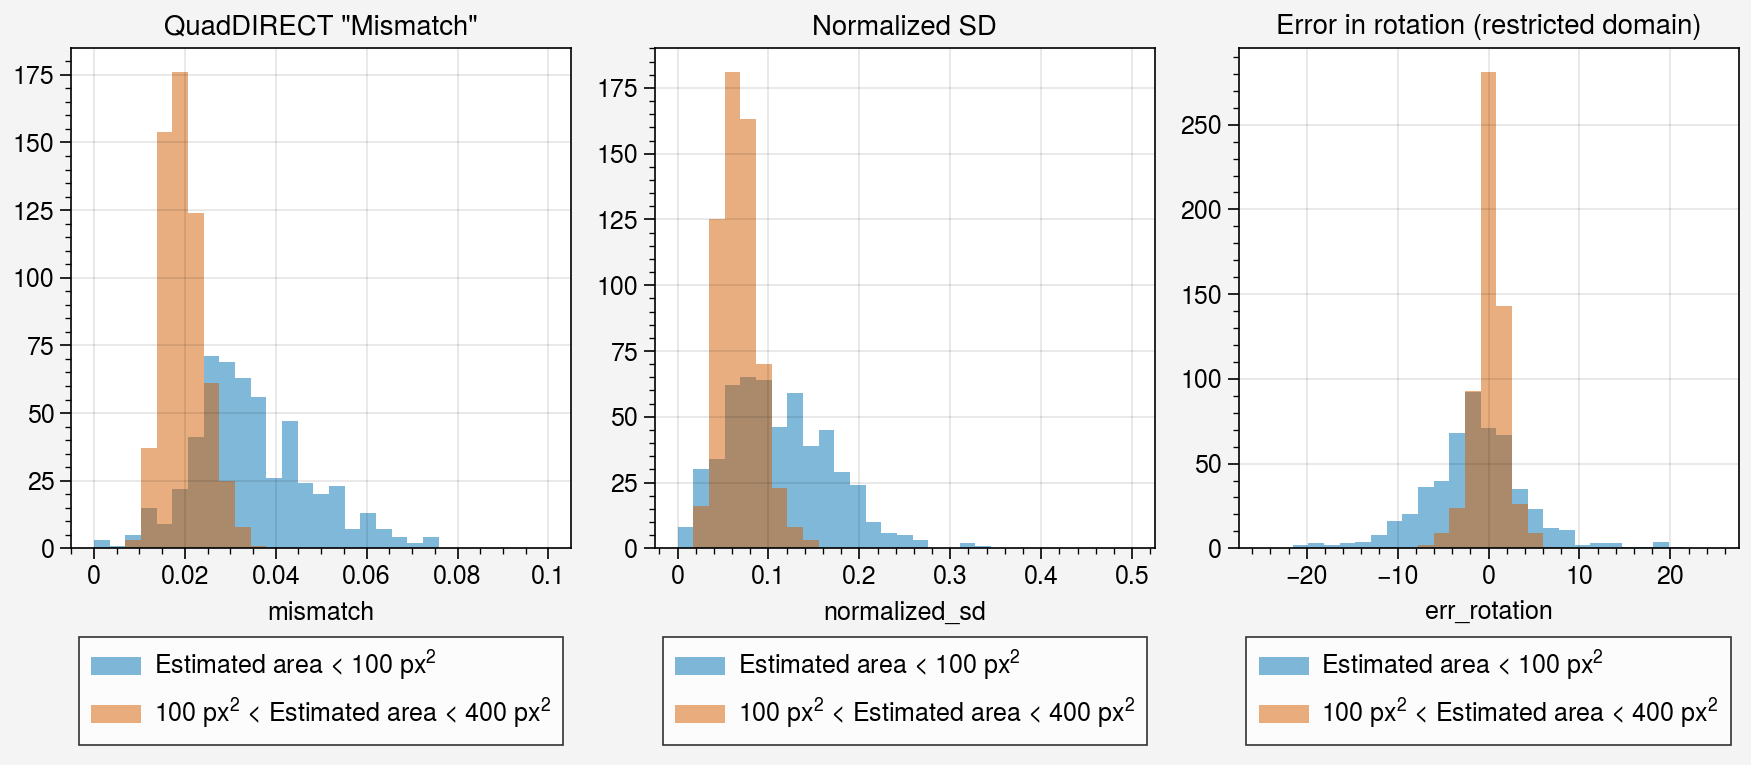

In [23]:
fig, axs = pplt.subplots(ncols=3, share=False)
ax = axs[0]
bins = np.linspace(0, 0.1, 30)
idx = (0 < df['rotation']) & (df['rotation'] < 60) 
idx = idx & (df['area'].values**0.5 < 10)
ax.hist(df.loc[idx, 'mismatch'], bins=bins, alpha=0.5, label='Estimated area < 100 px$^2$')

idx = (0 < df['rotation']) & (df['rotation'] < 60) 
idx = idx & ((df['area'].values**0.5 > 10) & (df['area'].values**0.5 < 20))
ax.hist(df.loc[idx, 'mismatch'], bins=bins, alpha=0.5, label='100 px$^2$ < Estimated area < 400 px$^2$')
ax.legend(loc='b', ncols=1)
ax.format(title='QuadDIRECT "Mismatch"')

ax = axs[1]
bins = np.linspace(0, 0.5, 30)

idx = (0 < df['rotation']) & (df['rotation'] < 60) 
idx = idx & (df['area'].values**0.5 < 10)
ax.hist(df.loc[idx, 'normalized_sd'], bins=bins, alpha=0.5, label='Estimated area < 100 px$^2$')

idx = (0 < df['rotation']) & (df['rotation'] < 60) 
idx = idx & ((df['area'].values**0.5 > 10) & (df['area'].values**0.5 < 20))
ax.hist(df.loc[idx, 'normalized_sd'], bins=bins, alpha=0.5, label='100 px$^2$ < Estimated area < 400 px$^2$')
ax.legend(loc='b', ncols=1)
ax.format(title='Normalized SD')

ax = axs[2]
bins = np.linspace(-25, 25, 30)

idx = (0 < df['rotation']) & (df['rotation'] < 60) 
idx = idx & (df['area'].values**0.5 < 10)
ax.hist(df.loc[idx, 'err_rotation'], bins=bins, alpha=0.5, label='Estimated area < 100 px$^2$')

idx = (0 < df['rotation']) & (df['rotation'] < 60) 
idx = idx & ((df['area'].values**0.5 > 10) & (df['area'].values**0.5 < 20))
ax.hist(df.loc[idx, 'err_rotation'], bins=bins, alpha=0.5, label='100 px$^2$ < Estimated area < 400 px$^2$')
ax.legend(loc='b', ncols=1)
ax.format(title='Error in rotation (restricted domain)')

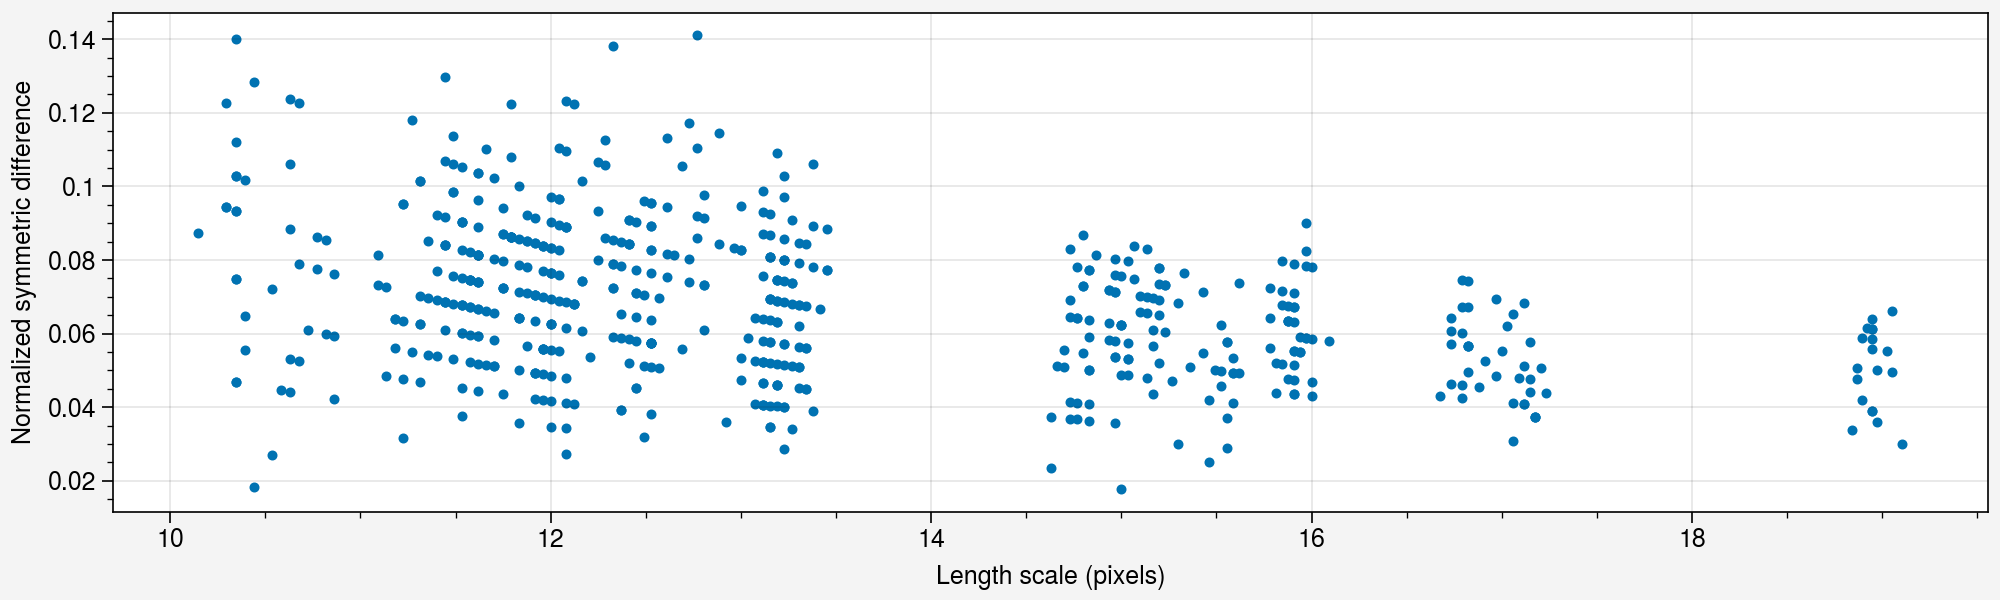

In [24]:
fig, ax = pplt.subplots(width=10, height=3)
# idx = (0 < df['rotation']) & (df['rotation'] < 60) 
ax.scatter((df.loc[idx, 'area'].values)**0.5,
           df.loc[idx, 'normalized_sd'].values, marker='.')
ax.format(xlabel='Length scale (pixels)')
ax.format(ylabel='Normalized symmetric difference')

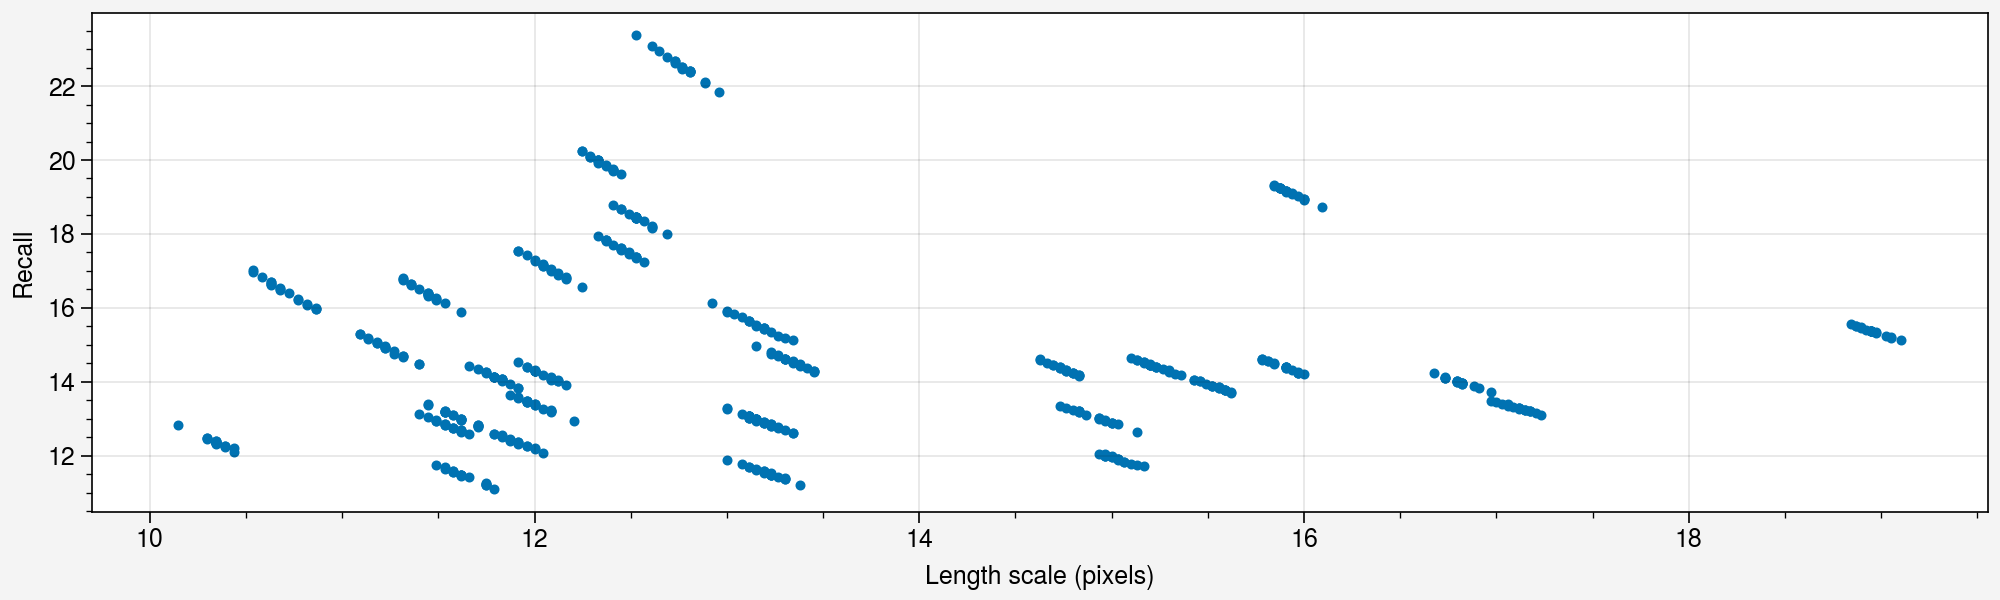

In [25]:
fig, ax = pplt.subplots(width=10, height=3)
# idx = (0 < df['rotation']) & (df['rotation'] < 60) 
ax.scatter((df.loc[idx, 'area'].values)**0.5,
           df.loc[idx, 'recall'].values, marker='.')
ax.format(xlabel='Length scale (pixels)')
ax.format(ylabel='Recall')

In [45]:
3/8

0.375

9286.0


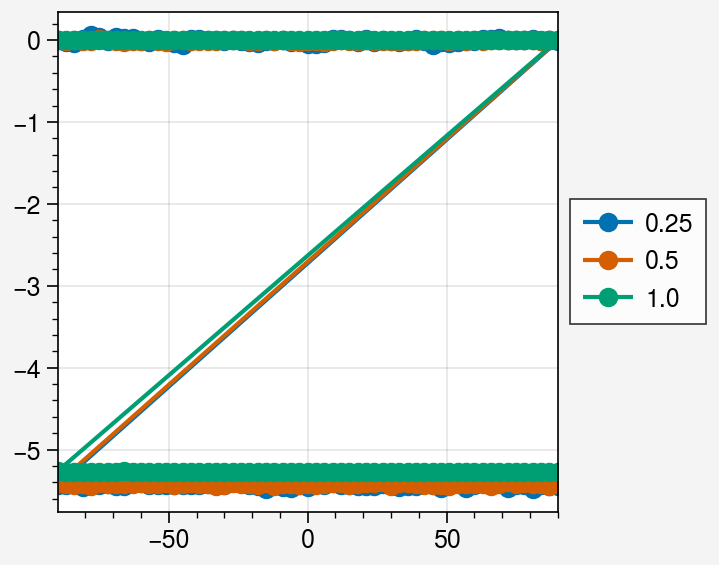

In [319]:
fig, ax = pplt.subplots()
print(df.loc[df.floe_id==1].area.max())
for s, data in df.loc[df.floe_id==1].groupby('scale'):
    ax.plot(data['rotation'].values,
            1-(data['area']/data['area'].values[0]).values, marker='o',
           label=s)
    # ax.plot(data['rotation'].values,
    #         data['adr_area'].values, marker='', ls='--',
    #        label=s)

ax.legend(ncols=1, loc='r')
# ax.format(ylim=(-0.25, 0.25), xlabel='rotation')
# ax.format(ylim=(0, np.pi), xlim=(0, np.pi))

1471.0


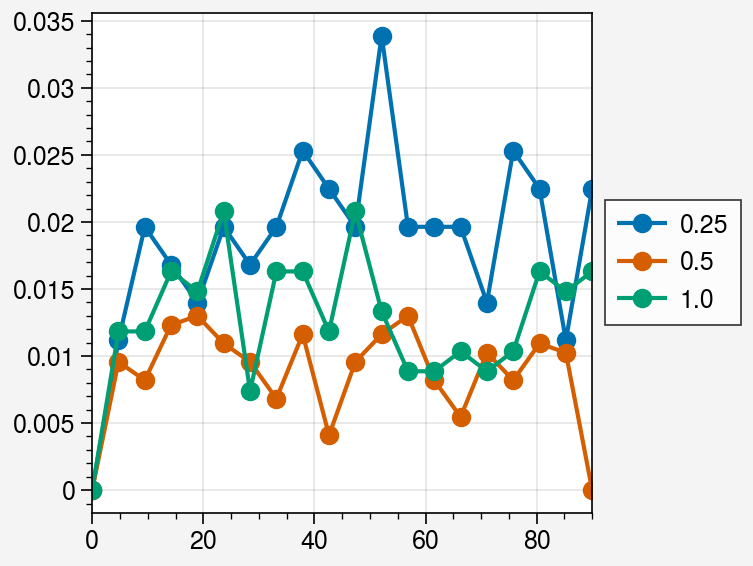

In [177]:
fig, ax = pplt.subplots()
print(df.loc[df.floe_id==1].area.max())
for s, data in df.loc[df.floe_id==1].groupby('size'):
    ax.plot(data['rotation'].values,
            data['adr_area'].values, marker='o',
           label=s)
ax.legend(ncols=1, loc='r')
# ax.format(ylim=(-0.25, 0.25), xlabel='rotation')
# ax.format(ylim=(0, np.pi), xlim=(0, np.pi))

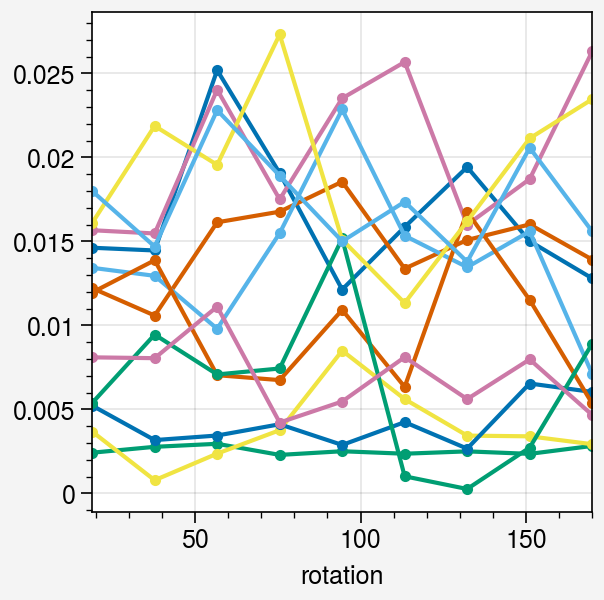

In [141]:
test = df.loc[df["size"]==1].groupby('floe_id').max()

fig, ax = pplt.subplots()
for floe_id in df['floe_id'].unique():
    ax.plot(df.where(df.rotation > 0).loc[(df["size"]==1) & (df['floe_id'] == floe_id),
            ['rotation', 'adr_major_axis_length']].set_index('rotation'), ls='-', marker='.')

In [138]:
# next steps
# double check the rotation images. Do they look okay? how do the sizes compare?
# Should we expect smaller ratios?
# Describe how to go from "variation under rotation" to "variation between floes" on this measure

Index(['floe_id', 'size', 'rotation', 'area', 'convex_area',
       'major_axis_length', 'minor_axis_length', 'adr_area', 'adr_convex_area',
       'adr_major_axis_length', 'adr_minor_axis_length', 'est_rotation',
       'mismatch', 'recall', 'normalized_sd', 'rotation_error'],
      dtype='object')